In [29]:
import numpy as np
import json
import re
import hashlib
import random
import requests
import pickle
import time
from google_trans_new import google_translator



# 翻译

In [30]:
train_data = json.load(open("D:/Documents/course/junior/ML/dataset/train.json", encoding='UTF-8'))
test_data = json.load(open("D:/Documents/course/junior/ML/dataset/test.json", encoding='UTF-8'))
train_cases, test_cases, train_labels = [], [], []

for each in train_data:
    train_cases.append(each['content'].replace('\n', '').replace('\xa0', '').replace('\r', ''))
    train_labels.append(each['label'])
for each in test_data:
    test_cases.append(each['content'].replace('\n', '').replace('\xa0', '').replace('\r', ''))


In [ ]:
import hashlib
import random
import requests


# 你的APP ID
appID = 'xxx'
# 你的密钥
secretKey = 'xxx'
# 百度翻译 API 的 HTTP 接口
apiURL = 'http://api.fanyi.baidu.com/api/trans/vip/translate'


def baiduAPI_translate(query_str, to_lang):
    '''
    传入待翻译的字符串和目标语言类型，请求 apiURL，自动检测传入的语言类型获得翻译结果
    :param query_str: 待翻译的字符串
    :param to_lang: 目标语言类型
    :return: 翻译结果字典
    '''
    # 生成随机的 salt 值
    salt = str(random.randint(32768, 65536))
    # 准备计算 sign 值需要的字符串
    pre_sign = appID + query_str + salt + secretKey
    # 计算 md5 生成 sign
    sign = hashlib.md5(pre_sign.encode()).hexdigest()
    # 请求 apiURL 所有需要的参数
    params = {
        'q': query_str,
        'from': 'auto',
        'to': to_lang,
        'appid': appID,
        'salt':salt,
        'sign': sign
    }
    try:
        # 直接将 params 和 apiURL 一起传入 requests.get() 函数
        response = requests.get(apiURL, params=params)
        # 获取返回的 json 数据
        result_dict = response.json()
        # 得到的结果正常则 return
        if 'trans_result' in result_dict:
            return result_dict
        else:
            print('Some errors occured:\n', result_dict)
    except Exception as e:
        print('Some errors occured: ', e)


In [ ]:

# 文本预处理
import pickle as pkl
corpus_parag = []
for doc in train_cases:
    corpus_parag.append(doc.split("\n"))

import time
corpus_trans = []
for index, doc in enumerate(corpus_parag):
    doc_trans = []
    for parag in doc:
        if len(parag) == 0:
            continue
        trans = baiduAPI_translate(parag, "en")
        time.sleep(1)
        doc_trans.append(trans["trans_result"])
    corpus_trans.append(doc_trans)
    print(f'{index}/{len(corpus_parag)}')

with open("D:/Documents/course/junior/ML/dataset/train_cases", "rb") as f:
    pkl.save(f, doc_trans)
    


# 载入数据

In [1]:

import pickle as pkl

with open("D:/Documents/course/junior/ML/dataset/train_cases", "rb") as f:
    train_corpus = pkl.load(f)
with open("D:/Documents/course/junior/ML/dataset/train_labels", "rb") as f:
    train_labels = pkl.load(f)
with open("D:/Documents/course/junior/ML/dataset/test_cases", "rb") as f:
    test_corpus = pkl.load(f)



In [10]:
# import re
# from nltk.stem.porter import PorterStemmer
# # print(train_corpus[0])
# train_data = []
# for doc in train_corpus:
#     doc = doc.lower()
#     doc = re.sub(r'[^a-zA-Z0-9]', " ", doc)
#     words = doc.split()
#     stemmer = PorterStemmer()
#     for i in range(len(words)):
#         words[i] = stemmer.stem(words[i])
#     for word in words:
#         doc = doc+word+" "
#     train_data.append(doc)


the affected figure is triggered  plus 4 500 patients and 106 dead  the number of infected by wuhanno elcoronavirus stops growing and every time it makes it faster  according to the latest data offered by the chinese national health commission  25 people have died in the last 24 hours and the total number of fatalities reaches 106 throughout the country  the number of cases confirmed  on the other hand  already reaches this tuesday 4 515  59  more than the 2 835 offered this monday  among the sick  515 are in a serious state  the number of cases suspected brushes the 7 000  while it is maintained in observation to almost 45 000 people  for santiago moreno  head of service of infectious diseases of ram n and cajal de madrid hospital  these figures are  very significant  and demonstrate that  the bud is still in its first phases     the ascending curve is still very marked  which means that it is still missing so that the peak is reached   says moreno  reports oriol g ell hong kong  wher

In [22]:

# test_data = []
# for doc in test_corpus:
#     doc = doc.lower()
#     doc = re.sub(r'[^a-zA-Z0-9]', " ", doc)
#     words = doc.split()
#     stemmer = PorterStemmer()
#     for i in range(len(words)):
#         words[i] = stemmer.stem(words[i])
#     for word in words:
#         doc = doc+word+" "
#     test_data.append(doc)



  (0, 252)	0.14845012335630697
  (0, 76)	0.14700299441740755
  (0, 3164)	0.048279459398723606
  (0, 364)	0.06056848362030951
  (0, 2705)	0.1367374840185305
  (0, 1015)	0.06703499041450664
  (0, 2989)	0.038056643583048964
  (0, 2176)	0.03827230351638809
  (0, 3417)	0.03999377901118044
  (0, 202)	0.04753460151480007
  (0, 4553)	0.08374124875178704
  (0, 3161)	0.06508360745316617
  (0, 3144)	0.08250048153684494
  (0, 696)	0.09332245090337588
  (0, 309)	0.13769298850367007
  (0, 267)	0.1431002284947266
  (0, 29)	0.0310214762064354
  (0, 2489)	0.042645294816733736
  (0, 2279)	0.29049082564885886
  (0, 2644)	0.06190223521506812
  (0, 1101)	0.11918847808016439
  (0, 3531)	0.045844236706396015
  (0, 2253)	0.13868597317898512
  (0, 2771)	0.0663081142460611
  (0, 3768)	0.14700299441740755
  :	:
  (0, 1586)	0.05826048744532358
  (0, 2052)	0.08529058963346747
  (0, 2102)	0.06135176014349348
  (0, 975)	0.04576536460127913
  (0, 3677)	0.06190223521506812
  (0, 2990)	0.04169839135279349
  (0, 2281)	0

In [2]:

# 验证集划分
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train_corpus, train_labels, test_size=0.25, random_state=1028)

# # 文本向量化
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk
# from nltk.corpus import stopwords

# # nltk.download('stopwords')


# vectorizer = TfidfVectorizer(max_features=4000, stop_words=None, lowercase=True, max_df=0.7)
# # train_data = vectorizer.fit_transform(x_train)
# train_data = vectorizer.fit_transform(train_corpus)
# # test_data = vectorizer.transform(x_test)
# print(train_data.shape)
# print(test_data.shape)



(2200, 4000)


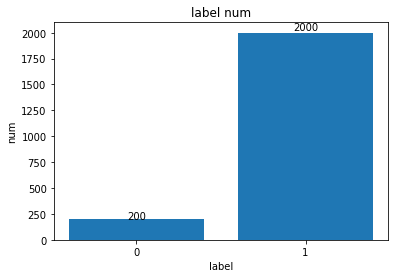

In [5]:
# from matplotlib import pyplot as plt 
# import numpy as np
# x = ["0","1"]
# label = np.array(train_labels)
# num1 = len(label[label==1])
# num0 = len(label[label==0])
# y = np.array([num0,num1])
# plt.bar(x,y,align="center") 
# plt.title('label num') 
# plt.ylabel('num') 
# plt.xlabel('label') 
# plt.annotate(str(num0), xy=(0,num0*1.01), ha="center", va = "baseline")
# plt.annotate(str(num1), xy=(1,num1*1.01), ha="center", va = "baseline")
# plt.show()

(2200, 2)


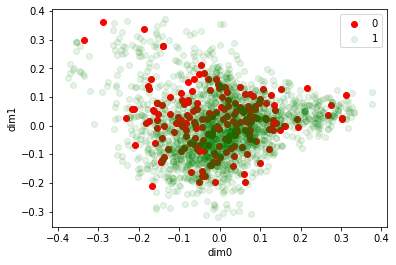

In [6]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import numpy as np
# pca = PCA(n_components=2)
# pca_train_data = pca.fit_transform(train_data.A)
# print(pca_train_data.shape)
# x0 = pca_train_data[np.where(label==0), 0]
# y0 = pca_train_data[np.where(label==0), 1]
# x1 = pca_train_data[np.where(label==1), 0]
# y1 = pca_train_data[np.where(label==1), 1]
# plt.scatter(x0,y0, c = 'r', alpha=1, label = "0")
# plt.scatter(x1,y1, c = "g", label = "1", alpha=0.1)
# plt.xlabel("dim0")
# plt.ylabel("dim1")
# plt.legend()
# plt.show()

In [41]:
import pickle as pkl
import re
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_file = "D:/Documents/course/junior/ML/dataset/train_cases"
train_label_file = "D:/Documents/course/junior/ML/dataset/train_labels"
test_file = "D:/Documents/course/junior/ML/dataset/test_cases"
result_file = "D:/Documents/course/junior/ML/dataset/result.txt"
model_list = [LogisticRegression()]
model_name_list = ["LogisticRegression"]

param_lists = []
param_NB = {"clf__alpha": [0.05],
            "vec__max_features" : [6000]}
param_LogReg = {
    "clf__max_iter": [100],
    "vec__max_features" : [6000],
    "clf__class_weight": ["balanced", None]
}
param_SVC = {
    "clf__C": [1],
    "clf__class_weight": ["balanced"]

}

# param_lists.append(param_NB)
param_lists.append(param_LogReg)
# param_lists.append(param_SVC)

# 载入数据
with open(train_file, "rb") as f:
    train_corpus = pkl.load(f)
with open(train_label_file, "rb") as f:
    train_labels = pkl.load(f)
with open(test_file, "rb") as f:
    test_corpus = pkl.load(f)


def clf_model(model):
    pipeline = Pipeline([("vec", CountVectorizer(max_features=4000, stop_words=None, lowercase=True, max_df=0.7)),
                            ("trans", TfidfTransformer()),
                            ("clf", model)])
    return pipeline


results = []
for index, model in enumerate(model_list):
    model_pipe = clf_model(model)
    gs = GridSearchCV(model_pipe, param_lists[index], verbose=100, refit=True, scoring="f1_macro", cv=3)
    gs.fit(train_corpus, train_labels)
    results.append(gs.predict(test_corpus))
    print("model: {} best_score:{}, best_param:{}".format(model_name_list[index], gs.best_score_, gs.best_params_))



Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START clf__class_weight=balanced, clf__max_iter=100, vec__max_features=6000
[CV 1/3; 1/2] END clf__class_weight=balanced, clf__max_iter=100, vec__max_features=6000;, score=0.696 total time=   1.2s
[CV 2/3; 1/2] START clf__class_weight=balanced, clf__max_iter=100, vec__max_features=6000
[CV 2/3; 1/2] END clf__class_weight=balanced, clf__max_iter=100, vec__max_features=6000;, score=0.687 total time=   1.3s
[CV 3/3; 1/2] START clf__class_weight=balanced, clf__max_iter=100, vec__max_features=6000
[CV 3/3; 1/2] END clf__class_weight=balanced, clf__max_iter=100, vec__max_features=6000;, score=0.686 total time=   1.2s
[CV 1/3; 2/2] START clf__class_weight=None, clf__max_iter=100, vec__max_features=6000
[CV 1/3; 2/2] END clf__class_weight=None, clf__max_iter=100, vec__max_features=6000;, score=0.476 total time=   1.2s
[CV 2/3; 2/2] START clf__class_weight=None, clf__max_iter=100, vec__max_features=6000
[CV 2/3; 2/2] END c

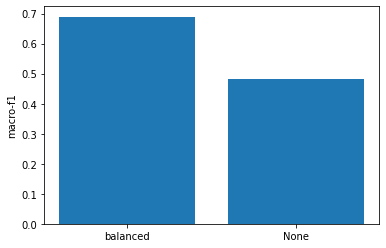

In [42]:
# import matplotlib.pyplot as plt

# plt.bar([param_SVC.get("clf__class_weight")[0], "None"], gs.cv_results_.get("mean_test_score"), align="center")
# # plt.xlabel("C")
# plt.ylabel("macro-f1")
# plt.show()

In [20]:

result_array = np.array(results)
# print(result_array)
result_array = result_array.sum(axis=0)
# print(result_array)
for i in range(len(result_array)):
    if result_array[i] < len(model_list):
        result_array[i] = 0
    else:
        result_array[i] = 1

# with open(result_file, "w") as f:
#     for i in result_array:
#         f.write(f'{i}\n')

# train_predict()
for i in result_array:
    print(i)



[[1 1 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 1 1 ... 1 0 1]]
[3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 2 3 3 3 3 2 3 3 3 3 3 2 3 3 2 3
 3 3 3 1 3 0 3 3 1 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 1 3 3 2 2 3 3 3 3 3 3
 3 3 3 1 2 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 1 1 3 3 3 3 2 3 1 3 3 3 3 2 3 3 2
 0 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 0 3 3 3 3 3 3 1 3 3 3 2 3
 3 3 3 3 3 1 3 3 3 3 2 0 1 3 3 3 2 3 3 3 2 2 3 0 3 1 3 3 2 3 3 0 3 3 3 3 2
 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 0 3 3 3 3 3 3 2 3 3 2 3 3 2
 1 3 2 3 3 3 3 3 3 3 3 3 0 2 1 3 3 0 1 3 3 3 3 3 3 3 1 3 2 3 3 3 0 3 2 1 0
 3 3 3 3 2 0 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 2 3 2
 3 3 3 3 2 3 2 3 3 3 3 0 1 3 3 3 3 3 3 3 3 3 3 3 2 3 3 0 3 3 3 3 3 3 2 3 3
 3 1 3 1 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 3 2 3 3 2 2 3 3 3 3 2 3 3 2 2 3 1 0 3 3 3 0 2 3 3 3 1 3 3 3 3 0
 2 2 2 2 2 3 3 2 2 2 3 3 3 3 2 1 3 3 3 2 2 3 2 3 2 3 3 3 3 3 2 3 3 3 3 2 3
 3 3 3 3 3 1 3 3 3 3 1 2 3 3 2 3 3 3 3 3 3

1000 0.762535
2000 0.761177
3000 0.772643
4000 0.775392
5000 0.769232
6000 0.775652
7000 0.767516
8000 0.767930
9000 0.764148
10000 0.759562
11000 0.757986
12000 0.766043

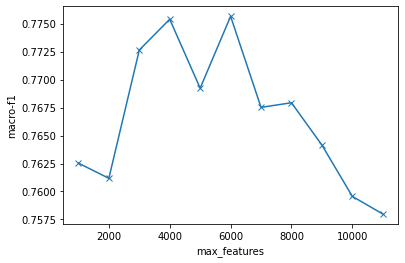

In [54]:
# x = np.arange(1000,12000,step=1000)
# y = [0.762535,0.761177,0.772643,0.775392,0.769232, 0.775652, 0.767516, 0.767930,0.764148, 0.759562,0.757986]
# plt.plot(x,y,marker="x")
# plt.xlabel('max_features')
# plt.ylabel("macro-f1")
# plt.show()